<a href="https://colab.research.google.com/github/balasri03/SupportVectorMachine_svc/blob/main/suportVectorMachineAndKernal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Basic SVM
here we use svc(support vector classifier)  
we use liner kernel as the data set is divided clearly



Import all required libraries  
and get data from sklearn.datasets

In [48]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=1,n_redundant=0)

In [4]:
X

array([[ 1.64946005,  1.06430282],
       [ 1.14528892,  0.98177204],
       [-0.07423693,  1.84650912],
       ...,
       [ 0.98843698,  0.74366893],
       [ 2.3481744 , -1.34435633],
       [ 1.72635563, -1.8384107 ]])

In [5]:
y

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Scatter plot of X,y  
as it shows the data points are divied clearly  
so we use linear kernel

<Axes: xlabel='0', ylabel='1'>

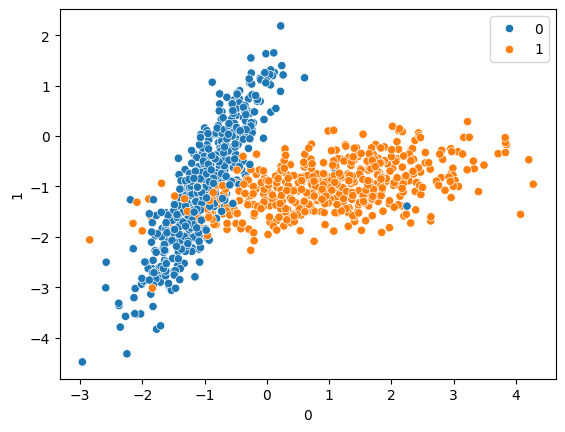

In [49]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

separate train and test data


In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=10,test_size=0.25)

##SVC (Support vector classifier)   

In [51]:
from sklearn.svm import SVC

# we use Linear as data is clearly divided
but in real world the data is not divided clearly  
for that we use different Kernel  
like RBF,Polynomial,Sigmoid kernels


In [52]:
svc=SVC(kernel='linear')
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [53]:
#predict
y_pred=svc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       131
           1       0.98      0.92      0.95       119

    accuracy                           0.95       250
   macro avg       0.96      0.95      0.95       250
weighted avg       0.95      0.95      0.95       250

[[129   2]
 [ 10 109]]


##Hyperparametere Tuning With SVC

In [54]:
from sklearn.model_selection import GridSearchCV

#defining parameter range
param_grid={'C':[0.1,1,10,100,1000],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['linear']
            }

In [57]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=3,cv=5)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.900 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.933 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.907 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.920 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.920 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.900 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.933 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.907 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.920 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.920 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.900 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [58]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'linear'}

In [59]:
y_pred=grid.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       131
           1       0.99      0.92      0.95       119

    accuracy                           0.96       250
   macro avg       0.96      0.95      0.96       250
weighted avg       0.96      0.96      0.96       250

[[130   1]
 [ 10 109]]
